# Bank Marketing: Building Decision Tree Classification

In [75]:
# importing libraries

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [76]:
# Checking the file Extension
import os

file_path = r"C:\Users\Admin\Documents\GitHub\PRODIGY_DS_03\bank_data.csv.xlsx"
file_extension = os.path.splitext(file_path)[1]
print(f"The file extension is: {file_extension}")

The file extension is: .xlsx


In [77]:
df=pd.read_excel("C:\\Users\\Admin\\Documents\\GitHub\\PRODIGY_DS_03\\bank_data.csv.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [78]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [79]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [80]:
# Converting data types
df['age'] = df['age'].astype(int)  # Ensure age is an integer
df['balance'] = df['balance'].astype(float)  # Convert balance to float

# Convert categorical columns to category type
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
df[categorical_columns] = df[categorical_columns].astype('category')

# Ensure day, duration, campaign, pdays, and previous are integers
numeric_columns = ['day', 'duration', 'campaign', 'pdays', 'previous']
df[numeric_columns] = df[numeric_columns].astype(int)

# Print data types to verify
print(df.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object


In [81]:
# Binary encoding for binary variables
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# One-hot encoding for multiclass categorical variables
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the transformed dataset
print(df_encoded.head())

   age default  balance housing loan  day  duration  campaign  pdays  \
0   30       0   1787.0       0    0   19        79         1     -1   
1   33       0   4789.0       1    1   11       220         1    339   
2   35       0   1350.0       1    0   16       185         1    330   
3   30       0   1476.0       1    1    3       199         4     -1   
4   59       0      0.0       1    0    5       226         1     -1   

   previous  ... month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...     False      False      False      False      False   
1         4  ...     False      False      False       True      False   
2         1  ...     False      False      False      False      False   
3         0  ...     False       True      False      False      False   
4         0  ...     False      False      False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0       True      False           False     

In [82]:
df_encoded.dtypes

age                       int64
default                category
balance                 float64
housing                category
loan                   category
day                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
y                      category
job_blue-collar            bool
job_entrepreneur           bool
job_housemaid              bool
job_management             bool
job_retired                bool
job_self-employed          bool
job_services               bool
job_student                bool
job_technician             bool
job_unemployed             bool
job_unknown                bool
marital_married            bool
marital_single             bool
education_secondary        bool
education_tertiary         bool
education_unknown          bool
contact_telephone          bool
contact_unknown            bool
month_aug                  bool
month_dec                  bool
month_fe

In [ ]:
#Splitting the data to training and test data
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['y'])  # Features (all columns except 'y')
y = df_encoded['y']  # Target variable

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3616, 42)
Testing data shape: (905, 42)


In [84]:
# Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Fit the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [88]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Display the first 10 predictions
print("Predictions:", y_pred[:30])


Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.9060773480662984
Confusion Matrix:
 [[785  22]
 [ 63  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.61      0.36      0.45        98

    accuracy                           0.91       905
   macro avg       0.77      0.66      0.70       905
weighted avg       0.89      0.91      0.89       905



C:\Users\Admin\AppData\Local\Temp\ipykernel_5300\203077716.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


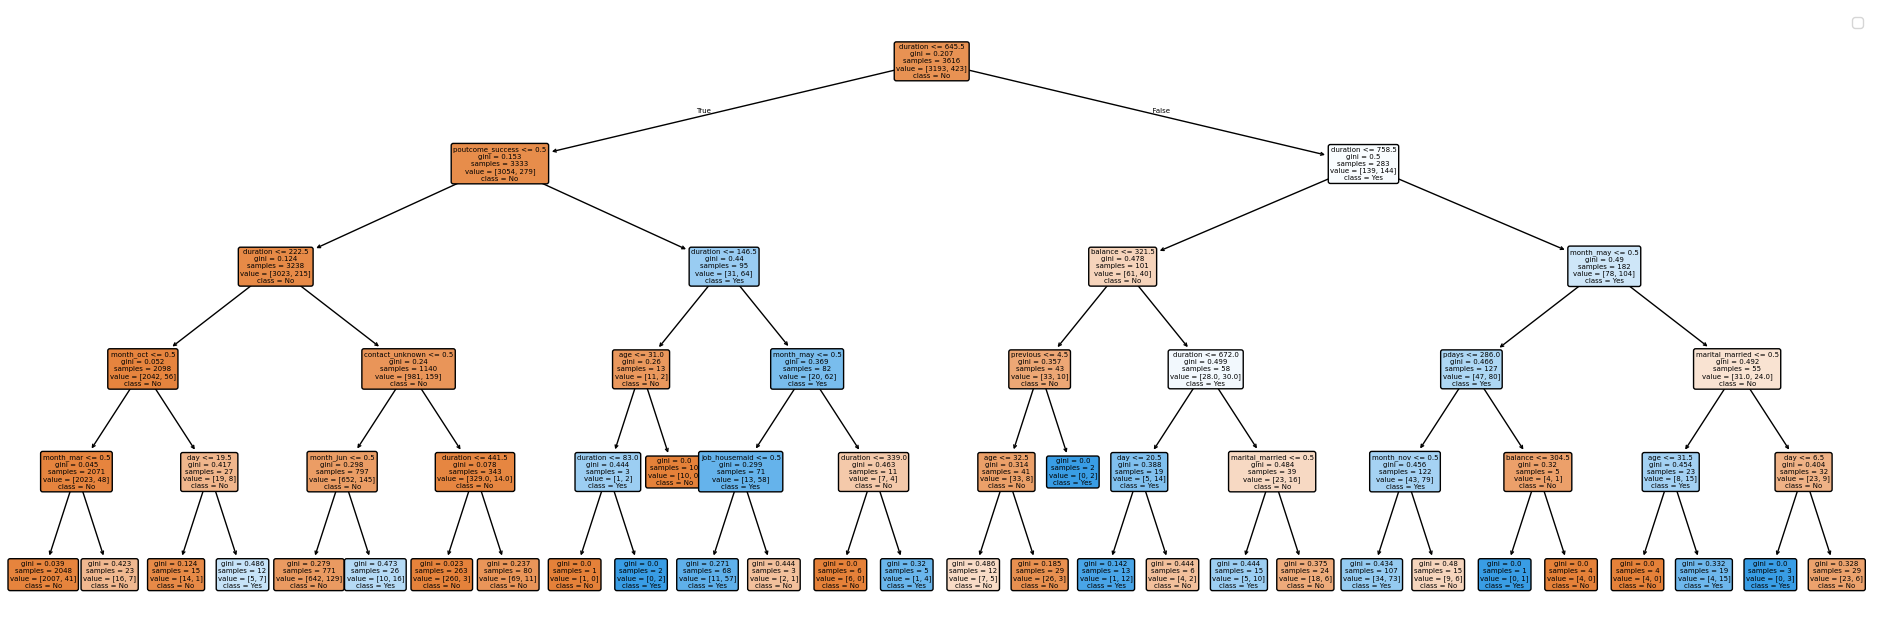

In [105]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(24,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True,fontsize=5)
plt.legend()
plt.show()


### Key Insights from the Decision Tree:
**Root Node**: The first decision is based on the variable duration (how long the contact lasted). If the duration is greater than 645.5 seconds, the prediction tends to be "Yes" (subscribed). Otherwise, it goes to further splits.

Branches and Splits:

**Outcome Success**: One important variable is whether the outcome of a previous campaign was "success" or not. If the outcome of a previous campaign was successful (i.e., "success" = 1), then a high duration again leads to a positive prediction (subscribed).
Contact Type: If the contact is via a certain method like "unknown", the tree looks into previous campaign results and duration to predict whether the customer will subscribe.
Month and Day: Time-related variables like month (e.g., March, October) and day of the week are also critical for prediction. For example, in the right branches of the tree, May and March show patterns of customers who are more likely to subscribe.

**Interpretation Summary:**

**"Yes" Predictions:**

Customers who had a long contact duration (above 645 seconds) are more likely to subscribe.
Success in a previous campaign is another strong indicator of subscription.
Months like May, and certain balance ranges or other attributes like previous outcomes, also increase the likelihood of subscription.

**"No" Predictions:**

Customers with shorter interactions, especially duration < 645 seconds, are more likely to not subscribe.
Additionally, attributes like balance and previous campaign outcome significantly influence the "No" prediction. Lower balances or non-successful previous campaigns are related to "No" predictions.

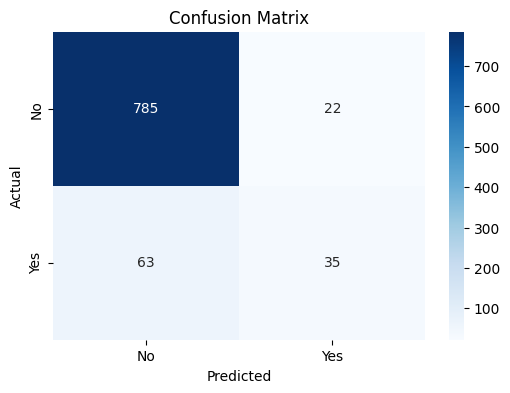

In [108]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Negatives (TN) and True Positives (TP) indicate the model is performing well in correctly identifying both outcomes.
False Positives (FP) and False Negatives (FN) represent areas for improvement, especially if false negatives are costly (e.g., missing actual subscribers).

In [112]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Example: Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=20)
selector = selector.fit(X_train, y_train)
X_train_selected = X_train.loc[:, selector.support_]
X_train_selected

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,default,housing,loan,job_blue-collar,job_entrepreneur,job_retired,job_unemployed,marital_married,education_unknown,contact_unknown,month_aug,month_feb,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success
978,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
251,0,0,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3139,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1822,0,0,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
4445,0,1,0,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
466,0,1,0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
3092,0,1,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3772,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


The above are the top 20 most important features(columns).

In [117]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Example: Cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

Cross-validation scores: [0.88950276 0.90456432 0.88934993 0.8769018  0.88934993]
Mean CV accuracy: 0.8899337475069347


The cross-validation scores indicate the model performs consistently across different data splits, with accuracy ranging from 87.7% to 90.5%. The average accuracy is 89%, showing the model predicts correctly most of the time and is likely to generalize well to unseen data